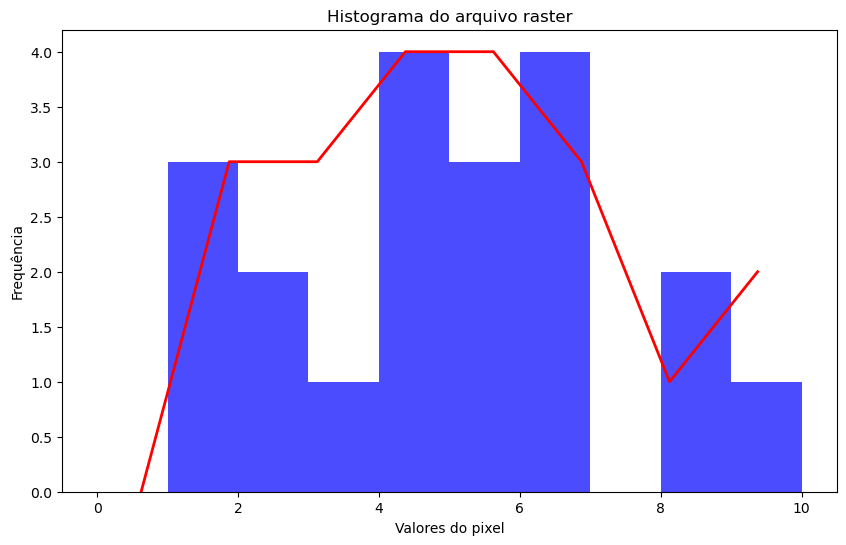

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

# Abra o arquivo raster .tif
file_path = "/home/ph_silva/UFSC/hidrogeocode/storage/INTERMEDIARY/GPM/rain_hourly/EARLY/2024/05/13/S20240513-203000_E20240513-205959.tif"
dataset = gdal.Open(file_path)
band = dataset.GetRasterBand(1)

raster_array = band.ReadAsArray()

raster_array = np.ma.masked_equal(raster_array, band.GetNoDataValue())

histogram, bins = np.histogram(raster_array.compressed(), bins=256, range=(0, 10))


# Plote o histograma
plt.figure(figsize=(10, 6))
plt.hist(raster_array.flatten(), bins=range(11), color='blue', alpha=0.7, edgecolor='none')
plt.title("Histograma do arquivo raster")
plt.xlabel("Valores do pixel")
plt.ylabel("Frequência")

# Adicione a linha para acompanhar o topo dos pilares
hist, bins = np.histogram(raster_array, bins=8, range=(0, 10))
width = 1.0 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.plot(center, hist, 'r-', linewidth=2)

plt.show()